In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df=df.drop(columns=['id','smoking_status', 'heart_disease', 'hypertension', 'bmi'])

In [ ]:
df.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,Male,67.0,Yes,Private,Urban,228.69,1
1,Female,61.0,Yes,Self-employed,Rural,202.21,1
2,Male,80.0,Yes,Private,Rural,105.92,1
3,Female,49.0,Yes,Private,Urban,171.23,1
4,Female,79.0,Yes,Self-employed,Rural,174.12,1


we encode the data without splitting since encoding is just replacing values and doesnt risk data leaking

In [ ]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

df['work_type']=le.fit_transform(df['work_type'])

df['Residence_type']=le.fit_transform(df['Residence_type'])

df['ever_married']=le.fit_transform(df['ever_married'])


we balance the data before proceeding since having the proper sized balanced data helps in scaling correctly

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

X = df.loc[:, :'avg_glucose_level']
y = df['stroke']

over = SMOTE(sampling_strategy=0.5)

under = RandomUnderSampler(sampling_strategy=1)

steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X, y)

print(Counter(y_resampled))


Counter({0: 2430, 1: 2430})


we split the data before scaling to avoid leaking data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.15,random_state=0)

we scale the train and test seperately from the knowledge of training data only to avoid data leaks

In [ ]:
sc=StandardScaler()
mms=MinMaxScaler()
x_train['age'] = mms.fit_transform(x_train['age'].values.reshape(-1, 1))
x_test['age'] = mms.transform(x_test['age'].values.reshape(-1, 1))

x_train['avg_glucose_level']=mms.fit_transform(x_train['avg_glucose_level'].values.reshape(-1, 1))
x_test['avg_glucose_level']=mms.transform(x_test['avg_glucose_level'].values.reshape(-1, 1))

x_train['gender']=sc.fit_transform(x_train['gender'].values.reshape(-1, 1))
x_test['gender']=sc.transform(x_test['gender'].values.reshape(-1, 1))

x_train['work_type']=sc.fit_transform(x_train['work_type'].values.reshape(-1, 1))
x_test['work_type']=sc.transform(x_test['work_type'].values.reshape(-1, 1))

x_train['Residence_type']=sc.fit_transform(x_train['Residence_type'].values.reshape(-1, 1))
x_test['Residence_type']=sc.transform(x_test['Residence_type'].values.reshape(-1, 1))

x_train['ever_married']=sc.fit_transform(x_train['ever_married'].values.reshape(-1, 1))
x_test['ever_married']=sc.transform(x_test['ever_married'].values.reshape(-1, 1))


In [ ]:
df.head()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,1,67.0,1,2,1,228.69,1
1,0,61.0,1,3,0,202.21,1
2,1,80.0,1,2,0,105.92,1
3,0,49.0,1,2,1,171.23,1
4,0,79.0,1,3,0,174.12,1


In [ ]:
print(x_train)

        gender       age  ever_married  work_type  Residence_type  \
5087 -0.695583  0.768066      0.614751   1.054460       -0.859014   
3148  1.437642  0.951172      0.614751   1.054460        1.164125   
319  -0.695583  0.353027     -1.626675   0.024435        1.164125   
4588 -0.695583  0.755859     -1.626675   0.024435        1.164125   
1953  1.437642  0.877930      0.614751   1.054460       -0.859014   
...        ...       ...           ...        ...             ...   
2303 -0.695583  0.914551      0.614751  -2.035615       -0.859014   
5695 -0.695583  0.829102      0.614751   0.024435       -0.859014   
880   1.437642  0.707031      0.614751  -2.035615        1.164125   
177   1.437642  0.951172      0.614751   1.054460       -0.859014   
5163 -0.695583  0.829102     -1.626675   0.024435        1.164125   

      avg_glucose_level  
5087           0.096067  
3148           0.676115  
319            0.077417  
4588           0.667805  
1953           0.088819  
...            

In [ ]:
print(x_test)

        gender       age  ever_married  work_type  Residence_type  \
4921  1.437642  0.877930      0.614751   0.024435       -0.859014   
4259 -0.695583  0.560547      0.614751   0.024435       -0.859014   
6696  1.437642  0.926088      0.614751   0.024435        1.164125   
4891 -0.695583  0.316406      0.614751  -2.035615        1.164125   
6253 -0.695583  0.815089      0.614751  -1.005590       -0.859014   
...        ...       ...           ...        ...             ...   
4369 -0.695583  0.633789      0.614751  -2.035615       -0.859014   
5528 -0.695583  0.960192      0.614751   0.024435        1.164125   
2085  1.437642  0.853516      0.614751   0.024435       -0.859014   
3352  1.437642  0.462891      0.614751  -2.035615       -0.859014   
5927 -0.695583  0.634267      0.614751   0.024435       -0.859014   

      avg_glucose_level  
4921           0.845490  
4259           0.122149  
6696           0.227068  
4891           0.080510  
6253           0.367736  
...            

In [ ]:
print(x_test)

        gender       age  ever_married  work_type  Residence_type  \
4921  1.437642  0.877930      0.614751   0.024435       -0.859014   
4259 -0.695583  0.560547      0.614751   0.024435       -0.859014   
6696  1.437642  0.926088      0.614751   0.024435        1.164125   
4891 -0.695583  0.316406      0.614751  -2.035615        1.164125   
6253 -0.695583  0.815089      0.614751  -1.005590       -0.859014   
...        ...       ...           ...        ...             ...   
4369 -0.695583  0.633789      0.614751  -2.035615       -0.859014   
5528 -0.695583  0.960192      0.614751   0.024435        1.164125   
2085  1.437642  0.853516      0.614751   0.024435       -0.859014   
3352  1.437642  0.462891      0.614751  -2.035615       -0.859014   
5927 -0.695583  0.634267      0.614751   0.024435       -0.859014   

      avg_glucose_level  
4921           0.845490  
4259           0.122149  
6696           0.227068  
4891           0.080510  
6253           0.367736  
...            

In [ ]:
# testing the model on the data and finding the stats for it...
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train) #train the model here
    prediction = classifier.predict(x_test) #test it here
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1) #how the model learns over time, 30 times, finds the mean
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean())) #training data
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    # advanced metrics , not used all the time, its for complex cases

    roc_display = RocCurveDisplay.from_predictions(y_test,prediction,alpha = 0.5)
    roc_display.plot()
    plt.title('ROC_AUC_Plot')
    plt.show()


def model_evaluation(classifier,x_test,y_test):
    colors = ['#3C1053','#DF6589']
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
print(x_train)

        gender       age  ever_married  work_type  Residence_type  \
5087 -0.695583  0.768066      0.614751   1.054460       -0.859014   
3148  1.437642  0.951172      0.614751   1.054460        1.164125   
319  -0.695583  0.353027     -1.626675   0.024435        1.164125   
4588 -0.695583  0.755859     -1.626675   0.024435        1.164125   
1953  1.437642  0.877930      0.614751   1.054460       -0.859014   
...        ...       ...           ...        ...             ...   
2303 -0.695583  0.914551      0.614751  -2.035615       -0.859014   
5695 -0.695583  0.829102      0.614751   0.024435       -0.859014   
880   1.437642  0.707031      0.614751  -2.035615        1.164125   
177   1.437642  0.951172      0.614751   1.054460       -0.859014   
5163 -0.695583  0.829102     -1.626675   0.024435        1.164125   

      avg_glucose_level  
5087           0.096067  
3148           0.676115  
319            0.077417  
4588           0.667805  
1953           0.088819  
...            

Cross Validation Score :  91.83%
ROC_AUC Score :  84.28%


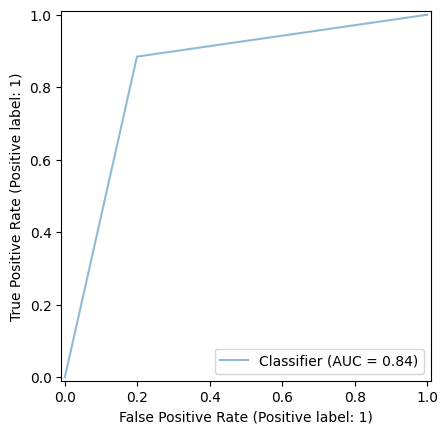

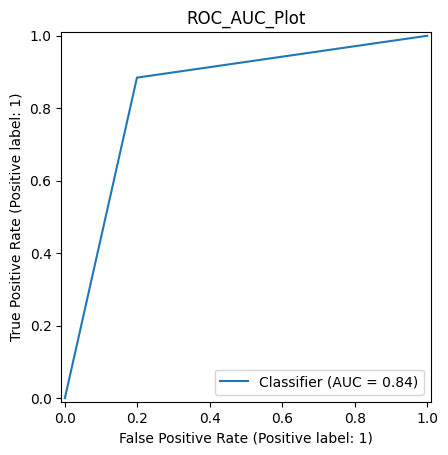

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       357
           1       0.82      0.88      0.85       372

    accuracy                           0.84       729
   macro avg       0.85      0.84      0.84       729
weighted avg       0.85      0.84      0.84       729



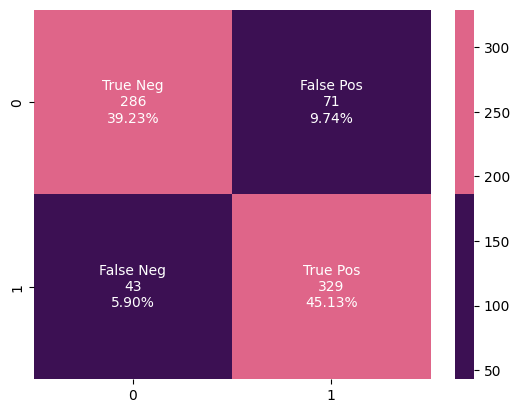

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=1000)
model(xgb,x_train,y_train,x_test,y_test)
model_evaluation(xgb,x_test,y_test)